In [1]:
# Copyright 2019 Steven Mattis and Troy Butler

import numpy as np
import matplotlib.pyplot as plt
import dynamical_systems as ds
from scipy.stats import gaussian_kde as GKDE
from math import *
from luq import *

The model is the Sel'kov model for glycolysis, a process by which living cells breakdown sugar to obtain energy:
$$x' = -(x+b) + a \left(y + \frac{b}{a+b^2} \right) + (x+b)^2 \left(y + \frac{b}{a+b^2}\right)$$
$$y' = b-a\left(y+ \frac{b}{a+b^2}\right) - (x+b)^2 \left(y + \frac{b}{a+b^2}\right), $$
where $x$ and $y$ represent concentrations of ADP and F6P, respectively, and $a,b>0$.
The initial conditions are $x(0) = x_0 \in \mathbb{R}$ and $y(0) = y_0 \in \mathbb{R}$.

The system has Hopf Bifurcations at 
$$b = b_1(a) = \sqrt{(1-\sqrt{1-8a}-2a)/2}$$
and
$$b = b_2(a) = \sqrt{(1+\sqrt{1-8a}-2a)/2}.$$
If $b<b_1$, the origin is a stable focus. If $b_1 < b < b_2$, there is a stable periodic orbit.
If $b > b_2$ the origin is a stable focus.

The system is solved numerically using the RK45 method.

A ***true*** distribution of $a, b,  x_0$, and $y_0$ are defined by (non-uniform)
Beta distributions and used to generate a set of time series data.

An ***initial*** uniform distribution is assumed and updated by the true time series data.

In [113]:
# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(1E3)

param_range = np.array([[0.01, 0.124], # a
                       [0.05, 1.5]])  #b
ic_range = np.array([[1.0, 1.0],  # y_0
                     [1.0, 1.0]])  # x_0

params = np.random.uniform(size=(num_samples, 2))
params = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params

ics = np.random.uniform(size=(num_samples, 2))
ics = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics

# labels
param_labels = [r'$a$', r'$b$']
ic_labels = [r'$x_0$', r'$y_0$']

# Construct the predicted time series data
num_time_preds = int(1000)  # number of predictions (uniformly space) between [time_start,time_end]
time_start = 0.5
time_end = 40.0
times = np.linspace(time_start, time_end, num_time_preds)

# Solve systems
phys = ds.Selkov()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

In [114]:
# Simulate an observed Beta distribution of time series data

num_obs = int(1E3)

true_a = 2
true_b = 2

params_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
params_obs = param_range[:, 0] + (param_range[:, 1] - param_range[:, 0]) * params_obs

ics_obs = np.random.beta(size=(num_obs, 2), a=true_a, b=true_b)
ics_obs = ic_range[:, 0] + (ic_range[:, 1] - ic_range[:, 0]) * ics_obs

# Solve system
observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

# Add noise if desired
with_noise = False
noise_stdev = 0.05

if with_noise:
    observed_time_series += noise_stdev * np.random.randn(num_obs)

In [115]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 40
time_end_idx = 150 #120

# Clean data
learn.clean_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_clean_obs=50, tol=3.0e-2, min_knots=8, max_knots=15)

0 9 0.023606952498625825
0 9 knots being used with error of 0.023606952498625825
1 9 0.006350265060455689
1 9 knots being used with error of 0.006350265060455689
2 9 0.023856960145101715
2 10 0.0190494162698824
2 10 knots being used with error of 0.0190494162698824
3 9 0.011042123977023652
3 9 knots being used with error of 0.011042123977023652
4 9 0.019645530151978084
4 9 knots being used with error of 0.019645530151978084
5 9 0.0070657981877428385
5 9 knots being used with error of 0.0070657981877428385
6 9 0.01622120335486829
6 9 knots being used with error of 0.01622120335486829
7 9 0.006422188740010365
7 9 knots being used with error of 0.006422188740010365
8 9 0.006195950462340684
8 9 knots being used with error of 0.006195950462340684
9 9 0.0041084155015737815
9 9 knots being used with error of 0.0041084155015737815
10 9 0.00813100849380602
10 9 knots being used with error of 0.00813100849380602
11 9 0.004533930003133335
11 9 knots being used with error of 0.004533930003133335
1

100 9 0.005301278051190943
100 9 knots being used with error of 0.005301278051190943
101 9 0.019623796469510815
101 9 knots being used with error of 0.019623796469510815
102 9 0.008810087279307832
102 9 knots being used with error of 0.008810087279307832
103 9 0.023805682014286397
103 10 0.022489626764704913
103 10 knots being used with error of 0.022489626764704913
104 9 0.014271103477728347
104 9 knots being used with error of 0.014271103477728347
105 9 0.005709250739073419
105 9 knots being used with error of 0.005709250739073419
106 9 0.0077914226422621646
106 9 knots being used with error of 0.0077914226422621646
107 9 0.0065818960548398794
107 9 knots being used with error of 0.0065818960548398794
108 9 0.009453116574214621
108 9 knots being used with error of 0.009453116574214621
109 9 0.010179160174230935
109 9 knots being used with error of 0.010179160174230935
110 9 0.010268694665157483
110 9 knots being used with error of 0.010268694665157483
111 9 0.017790137965801124
111 9

197 9 0.010189568802753941
197 9 knots being used with error of 0.010189568802753941
198 9 0.01026677730215269
198 9 knots being used with error of 0.01026677730215269
199 9 0.024455772877191213
199 10 0.02321695421158492
199 10 knots being used with error of 0.02321695421158492
200 9 0.018952752492756728
200 9 knots being used with error of 0.018952752492756728
201 9 0.00894565841404605
201 9 knots being used with error of 0.00894565841404605
202 9 0.005670824851433239
202 9 knots being used with error of 0.005670824851433239
203 9 0.014973351626628748
203 9 knots being used with error of 0.014973351626628748
204 9 0.013375423917741817
204 9 knots being used with error of 0.013375423917741817
205 9 0.02279326586409402
205 9 knots being used with error of 0.02279326586409402
206 9 0.015170666973944787
206 9 knots being used with error of 0.015170666973944787
207 9 0.008718731299619168
207 9 knots being used with error of 0.008718731299619168
208 9 0.0076657477721024095
208 9 knots bein

292 9 0.02228911169119956
292 9 knots being used with error of 0.02228911169119956
293 9 0.007871658817378346
293 9 knots being used with error of 0.007871658817378346
294 9 0.023347139453925914
294 9 knots being used with error of 0.023347139453925914
295 9 0.005145578556257841
295 9 knots being used with error of 0.005145578556257841
296 9 0.006820342527219594
296 9 knots being used with error of 0.006820342527219594
297 9 0.005818759141522583
297 9 knots being used with error of 0.005818759141522583
298 9 0.006954458789916786
298 9 knots being used with error of 0.006954458789916786
299 9 0.0033188026074805112
299 9 knots being used with error of 0.0033188026074805112
300 9 0.018559672571488262
300 9 knots being used with error of 0.018559672571488262
301 9 0.017576105474625885
301 9 knots being used with error of 0.017576105474625885
302 9 0.0037503858963440595
302 9 knots being used with error of 0.0037503858963440595
303 9 0.004816841836513813
303 9 knots being used with error of

390 9 0.008659725751139508
390 9 knots being used with error of 0.008659725751139508
391 9 0.011074438903421104
391 9 knots being used with error of 0.011074438903421104
392 9 0.005599440573653358
392 9 knots being used with error of 0.005599440573653358
393 9 0.005899291729197259
393 9 knots being used with error of 0.005899291729197259
394 9 0.005409740376100477
394 9 knots being used with error of 0.005409740376100477
395 9 0.004265939585913914
395 9 knots being used with error of 0.004265939585913914
396 9 0.008453064891207443
396 9 knots being used with error of 0.008453064891207443
397 9 0.008661319813338881
397 9 knots being used with error of 0.008661319813338881
398 9 0.017911630713475103
398 9 knots being used with error of 0.017911630713475103
399 9 0.0038276724729981344
399 9 knots being used with error of 0.0038276724729981344
400 9 0.00952781331463504
400 9 knots being used with error of 0.00952781331463504
401 9 0.011038161569216375
401 9 knots being used with error of 0

486 9 0.01294288476358811
486 9 knots being used with error of 0.01294288476358811
487 9 0.012896727439305006
487 9 knots being used with error of 0.012896727439305006
488 9 0.005519512033087597
488 9 knots being used with error of 0.005519512033087597
489 9 0.01168516610615718
489 9 knots being used with error of 0.01168516610615718
490 9 0.017758983304965167
490 9 knots being used with error of 0.017758983304965167
491 9 0.007843224309609629
491 9 knots being used with error of 0.007843224309609629
492 9 0.008904249025090297
492 9 knots being used with error of 0.008904249025090297
493 9 0.012914236910055875
493 9 knots being used with error of 0.012914236910055875
494 9 0.007377996027572099
494 9 knots being used with error of 0.007377996027572099
495 9 0.005096328925859483
495 9 knots being used with error of 0.005096328925859483
496 9 0.0033034287226663657
496 9 knots being used with error of 0.0033034287226663657
497 9 0.0043459371024911755
497 9 knots being used with error of 0.

583 9 0.007596805216230431
583 9 knots being used with error of 0.007596805216230431
584 9 0.009465064649721138
584 9 knots being used with error of 0.009465064649721138
585 9 0.010235910288733555
585 9 knots being used with error of 0.010235910288733555
586 9 0.00855330926593595
586 9 knots being used with error of 0.00855330926593595
587 9 0.005954895663229734
587 9 knots being used with error of 0.005954895663229734
588 9 0.005255992658378067
588 9 knots being used with error of 0.005255992658378067
589 9 0.005778072583175064
589 9 knots being used with error of 0.005778072583175064
590 9 0.008888470137059354
590 9 knots being used with error of 0.008888470137059354
591 9 0.004181553289675652
591 9 knots being used with error of 0.004181553289675652
592 9 0.008466523754991753
592 9 knots being used with error of 0.008466523754991753
593 9 0.004560342826675043
593 9 knots being used with error of 0.004560342826675043
594 9 0.005403994334234035
594 9 knots being used with error of 0.0

682 9 0.006850628966985967
682 9 knots being used with error of 0.006850628966985967
683 9 0.024134006635948068
683 10 0.018615652052811196
683 10 knots being used with error of 0.018615652052811196
684 9 0.005655290551969497
684 9 knots being used with error of 0.005655290551969497
685 9 0.005872179197349931
685 9 knots being used with error of 0.005872179197349931
686 9 0.008701702871038781
686 9 knots being used with error of 0.008701702871038781
687 9 0.00802958533741405
687 9 knots being used with error of 0.00802958533741405
688 9 0.009328514748286977
688 9 knots being used with error of 0.009328514748286977
689 9 0.009698683861031595
689 9 knots being used with error of 0.009698683861031595
690 9 0.008488171391754664
690 9 knots being used with error of 0.008488171391754664
691 9 0.006192421757401944
691 9 knots being used with error of 0.006192421757401944
692 9 0.022720099191327708
692 9 knots being used with error of 0.022720099191327708
693 9 0.008774101234519684
693 9 knots

778 9 0.008665229685849608
778 9 knots being used with error of 0.008665229685849608
779 9 0.010060153992598391
779 9 knots being used with error of 0.010060153992598391
780 9 0.009992399963048794
780 9 knots being used with error of 0.009992399963048794
781 9 0.009115091857644614
781 9 knots being used with error of 0.009115091857644614
782 9 0.01012077903656652
782 9 knots being used with error of 0.01012077903656652
783 9 0.011114465019616233
783 9 knots being used with error of 0.011114465019616233
784 9 0.004913069758293002
784 9 knots being used with error of 0.004913069758293002
785 9 0.016287972716068966
785 9 knots being used with error of 0.016287972716068966
786 9 0.004516706243702361
786 9 knots being used with error of 0.004516706243702361
787 9 0.010187039064831278
787 9 knots being used with error of 0.010187039064831278
788 9 0.014752030249160249
788 9 knots being used with error of 0.014752030249160249
789 9 0.011113338505161267
789 9 knots being used with error of 0.0

875 9 0.007410732310691818
875 9 knots being used with error of 0.007410732310691818
876 9 0.011492137679862919
876 9 knots being used with error of 0.011492137679862919
877 9 0.005056727674706125
877 9 knots being used with error of 0.005056727674706125
878 9 0.024204351274838828
878 10 0.01962934752269308
878 10 knots being used with error of 0.01962934752269308
879 9 0.010325147174953489
879 9 knots being used with error of 0.010325147174953489
880 9 0.008821787307161778
880 9 knots being used with error of 0.008821787307161778
881 9 0.01691461546860175
881 9 knots being used with error of 0.01691461546860175
882 9 0.005125684999061693
882 9 knots being used with error of 0.005125684999061693
883 9 0.005364540635593505
883 9 knots being used with error of 0.005364540635593505
884 9 0.0061041967333989805
884 9 knots being used with error of 0.0061041967333989805
885 9 0.024758237024088324
885 9 knots being used with error of 0.024758237024088324
886 9 0.005202686252379165
886 9 knots

/Users/smattis/src/anaconda3/anaconda3/envs/loq.py/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


932 9 0.010202038373263202
932 9 knots being used with error of 0.010202038373263202
933 9 0.009329502071654592
933 9 knots being used with error of 0.009329502071654592
934 9 0.008348002589875555
934 9 knots being used with error of 0.008348002589875555
935 9 0.005117889653247184
935 9 knots being used with error of 0.005117889653247184
936 9 0.015104586714752786
936 9 knots being used with error of 0.015104586714752786
937 9 0.005968133090104341
937 9 knots being used with error of 0.005968133090104341
938 9 0.007294440753952746
938 9 knots being used with error of 0.007294440753952746
939 9 0.010623902119769957
939 9 knots being used with error of 0.010623902119769957
940 9 0.02567656339677778
940 9 knots being used with error of 0.02567656339677778
941 9 0.02458261599024233
941 9 knots being used with error of 0.02458261599024233
942 9 0.004134203362371415
942 9 knots being used with error of 0.004134203362371415
943 9 0.005524252763863503
943 9 knots being used with error of 0.005

33 9 0.006606018708070176
33 9 knots being used with error of 0.006606018708070176
34 9 0.009822805889335005
34 9 knots being used with error of 0.009822805889335005
35 9 0.005532735875842583
35 9 knots being used with error of 0.005532735875842583
36 9 0.006764981301502898
36 9 knots being used with error of 0.006764981301502898
37 9 0.01736011010108295
37 9 knots being used with error of 0.01736011010108295
38 9 0.023957057286050368
38 9 knots being used with error of 0.023957057286050368
39 9 0.007573607604876794
39 9 knots being used with error of 0.007573607604876794
40 9 0.00411427024120383
40 9 knots being used with error of 0.00411427024120383
41 9 0.015914440185490854
41 9 knots being used with error of 0.015914440185490854
42 9 0.011605676110984533
42 9 knots being used with error of 0.011605676110984533
43 9 0.0034244699570796667
43 9 knots being used with error of 0.0034244699570796667
44 9 0.006173680380040413
44 9 knots being used with error of 0.006173680380040413
45 9 0

136 9 0.004692189100724122
136 9 knots being used with error of 0.004692189100724122
137 9 0.012687288113703881
137 9 knots being used with error of 0.012687288113703881
138 9 0.01724992832736626
138 9 knots being used with error of 0.01724992832736626
139 9 0.005782485941870397
139 9 knots being used with error of 0.005782485941870397
140 9 0.00908944516791699
140 9 knots being used with error of 0.00908944516791699
141 9 0.006937618699692262
141 9 knots being used with error of 0.006937618699692262
142 9 0.005995686478495172
142 9 knots being used with error of 0.005995686478495172
143 9 0.005112029835740412
143 9 knots being used with error of 0.005112029835740412
144 9 0.01493856337060755
144 9 knots being used with error of 0.01493856337060755
145 9 0.006383471851031223
145 9 knots being used with error of 0.006383471851031223
146 9 0.005631721322514153
146 9 knots being used with error of 0.005631721322514153
147 9 0.007559710945351238
147 9 knots being used with error of 0.00755

234 9 0.006272356915081244
234 9 knots being used with error of 0.006272356915081244
235 9 0.022661631074371226
235 9 knots being used with error of 0.022661631074371226
236 9 0.009839301733400335
236 9 knots being used with error of 0.009839301733400335
237 9 0.008857688982229767
237 9 knots being used with error of 0.008857688982229767
238 9 0.009945356828302753
238 9 knots being used with error of 0.009945356828302753
239 9 0.011898676235538605
239 9 knots being used with error of 0.011898676235538605
240 9 0.009084022571672578
240 9 knots being used with error of 0.009084022571672578
241 9 0.004582999125139689
241 9 knots being used with error of 0.004582999125139689
242 9 0.01272760079299148
242 9 knots being used with error of 0.01272760079299148
243 9 0.0035638875949822978
243 9 knots being used with error of 0.0035638875949822978
244 9 0.011346631992269788
244 9 knots being used with error of 0.011346631992269788
245 9 0.006059914703550966
245 9 knots being used with error of 0

332 9 0.011827127462290586
332 9 knots being used with error of 0.011827127462290586
333 9 0.006995116556612025
333 9 knots being used with error of 0.006995116556612025
334 9 0.006935336580125282
334 9 knots being used with error of 0.006935336580125282
335 9 0.00482918271501621
335 9 knots being used with error of 0.00482918271501621
336 9 0.006109526530251041
336 9 knots being used with error of 0.006109526530251041
337 9 0.006875475367553713
337 9 knots being used with error of 0.006875475367553713
338 9 0.0146681906199424
338 9 knots being used with error of 0.0146681906199424
339 9 0.005116707059529641
339 9 knots being used with error of 0.005116707059529641
340 9 0.009042572499250638
340 9 knots being used with error of 0.009042572499250638
341 9 0.016817560132070277
341 9 knots being used with error of 0.016817560132070277
342 9 0.008487394003147516
342 9 knots being used with error of 0.008487394003147516
343 9 0.007257210393993176
343 9 knots being used with error of 0.00725

431 9 0.009250029457619893
431 9 knots being used with error of 0.009250029457619893
432 9 0.023741697186397164
432 9 knots being used with error of 0.023741697186397164
433 9 0.0050281958285570095
433 9 knots being used with error of 0.0050281958285570095
434 9 0.011318632815240693
434 9 knots being used with error of 0.011318632815240693
435 9 0.022184915362604272
435 9 knots being used with error of 0.022184915362604272
436 9 0.011249434982906249
436 9 knots being used with error of 0.011249434982906249
437 9 0.004078967199553385
437 9 knots being used with error of 0.004078967199553385
438 9 0.013261938030387447
438 9 knots being used with error of 0.013261938030387447
439 9 0.013252109976440697
439 9 knots being used with error of 0.013252109976440697
440 9 0.005906776531565491
440 9 knots being used with error of 0.005906776531565491
441 9 0.011086903426908483
441 9 knots being used with error of 0.011086903426908483
442 9 0.005547669945123994
442 9 knots being used with error of

529 9 0.018760691095700742
529 9 knots being used with error of 0.018760691095700742
530 9 0.016410620231614187
530 9 knots being used with error of 0.016410620231614187
531 9 0.00823466900170101
531 9 knots being used with error of 0.00823466900170101
532 9 0.005487842790080402
532 9 knots being used with error of 0.005487842790080402
533 9 0.006402473549364296
533 9 knots being used with error of 0.006402473549364296
534 9 0.0047770074822301965
534 9 knots being used with error of 0.0047770074822301965
535 9 0.0052869213383620476
535 9 knots being used with error of 0.0052869213383620476
536 9 0.010019240425745934
536 9 knots being used with error of 0.010019240425745934
537 9 0.006711216500221197
537 9 knots being used with error of 0.006711216500221197
538 9 0.004605202689498098
538 9 knots being used with error of 0.004605202689498098
539 9 0.004589743795316802
539 9 knots being used with error of 0.004589743795316802
540 9 0.006678753072244338
540 9 knots being used with error of

634 9 0.00717779735146965
634 9 knots being used with error of 0.00717779735146965
635 9 0.006343203787228829
635 9 knots being used with error of 0.006343203787228829
636 9 0.011543285546664176
636 9 knots being used with error of 0.011543285546664176
637 9 0.008897067641845708
637 9 knots being used with error of 0.008897067641845708
638 9 0.008924186521352845
638 9 knots being used with error of 0.008924186521352845
639 9 0.0069529156948158165
639 9 knots being used with error of 0.0069529156948158165
640 9 0.015836236303601883
640 9 knots being used with error of 0.015836236303601883
641 9 0.005638247268683712
641 9 knots being used with error of 0.005638247268683712
642 9 0.005083002061971488
642 9 knots being used with error of 0.005083002061971488
643 9 0.01010035498910469
643 9 knots being used with error of 0.01010035498910469
644 9 0.024674983860882557
644 9 knots being used with error of 0.024674983860882557
645 9 0.01751891561513078
645 9 knots being used with error of 0.01

735 9 0.0040816988595584
735 9 knots being used with error of 0.0040816988595584
736 9 0.01140091022818351
736 9 knots being used with error of 0.01140091022818351
737 9 0.011016267111119452
737 9 knots being used with error of 0.011016267111119452
738 9 0.009857579820788238
738 9 knots being used with error of 0.009857579820788238
739 9 0.0138134520164987
739 9 knots being used with error of 0.0138134520164987
740 9 0.005666032415337867
740 9 knots being used with error of 0.005666032415337867
741 9 0.008072177148640013
741 9 knots being used with error of 0.008072177148640013
742 9 0.010967559220819127
742 9 knots being used with error of 0.010967559220819127
743 9 0.0058727348833051175
743 9 knots being used with error of 0.0058727348833051175
744 9 0.017880221858895456
744 9 knots being used with error of 0.017880221858895456
745 9 0.022529050320297235
745 9 knots being used with error of 0.022529050320297235
746 9 0.0035817007345531975
746 9 knots being used with error of 0.003581

834 9 0.008374722378090829
834 9 knots being used with error of 0.008374722378090829
835 9 0.004074540446840782
835 9 knots being used with error of 0.004074540446840782
836 9 0.02269302175413208
836 9 knots being used with error of 0.02269302175413208
837 9 0.007959839756541385
837 9 knots being used with error of 0.007959839756541385
838 9 0.01307765744853826
838 9 knots being used with error of 0.01307765744853826
839 9 0.0073014043305885115
839 9 knots being used with error of 0.0073014043305885115
840 9 0.0050892944932551115
840 9 knots being used with error of 0.0050892944932551115
841 9 0.022688035795310202
841 9 knots being used with error of 0.022688035795310202
842 9 0.006893940554687545
842 9 knots being used with error of 0.006893940554687545
843 9 0.01604577049809662
843 9 knots being used with error of 0.01604577049809662
844 9 0.006313610520496976
844 9 knots being used with error of 0.006313610520496976
845 9 0.007610558620423005
845 9 knots being used with error of 0.0

940 9 0.006570567594612779
940 9 knots being used with error of 0.006570567594612779
941 9 0.005137801324542374
941 9 knots being used with error of 0.005137801324542374
942 9 0.004006441186008638
942 9 knots being used with error of 0.004006441186008638
943 9 0.006452170443685122
943 9 knots being used with error of 0.006452170443685122
944 9 0.006973867797451851
944 9 knots being used with error of 0.006973867797451851
945 9 0.003955732360548104
945 9 knots being used with error of 0.003955732360548104
946 9 0.0071914117765154275
946 9 knots being used with error of 0.0071914117765154275
947 9 0.005837235236319455
947 9 knots being used with error of 0.005837235236319455
948 9 0.011706490204719906
948 9 knots being used with error of 0.011706490204719906
949 9 0.006337785013617632
949 9 knots being used with error of 0.006337785013617632
950 9 0.02341213779747304
950 9 knots being used with error of 0.02341213779747304
951 9 0.02431865663950948
951 9 knots being used with error of 0.

(array([[ 0.16257807,  0.1348158 ,  0.10705353, ...,  0.02633114,
          0.02525223,  0.02417332],
        [ 0.34373479,  0.30001733,  0.25629988, ..., -0.27008845,
         -0.26797581, -0.26586317],
        [ 0.16608898,  0.13816988,  0.11025078, ...,  0.01746016,
          0.01649321,  0.01552626],
        ...,
        [ 0.39395336,  0.34522898,  0.2965046 , ..., -0.42693481,
         -0.42870642, -0.43047804],
        [ 0.43441414,  0.39327968,  0.35214522, ..., -0.12860491,
         -0.12827012, -0.12793532],
        [ 0.54010462,  0.48863424,  0.43716385, ..., -0.22513647,
         -0.22598569, -0.2268349 ]]),
 array([[ 0.21780494,  0.17843392,  0.13906289, ..., -0.21840857,
         -0.1994834 , -0.18055823],
        [ 0.47431062,  0.42512785,  0.37594508, ..., -0.27089829,
         -0.27148377, -0.27206925],
        [ 0.38544958,  0.3417215 ,  0.29799341, ..., -0.24378295,
         -0.24262927, -0.2414756 ],
        ...,
        [ 0.16771468,  0.13625211,  0.10478955, ...,  

In [116]:
# Learn and classify dynamics
learn.dynamics(cluster_method='kmeans', kwargs={'n_clusters': 3, 'n_init': 10})

0.011 misclassification rate for  {'kernel': 'linear'}
0.009999999999999998 misclassification rate for  {'kernel': 'rbf'}
0.583 misclassification rate for  {'kernel': 'poly'}
0.016999999999999998 misclassification rate for  {'kernel': 'sigmoid'}
Best classifier is  {'kernel': 'rbf'}
Misclassification rate is  0.009999999999999998


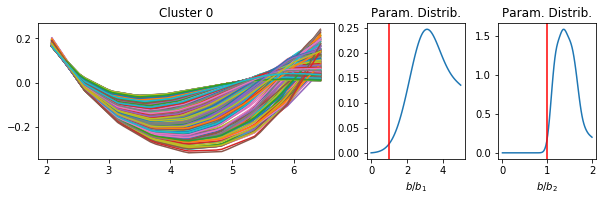

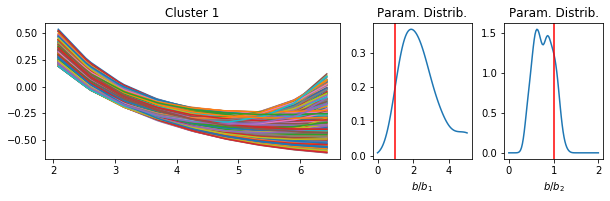

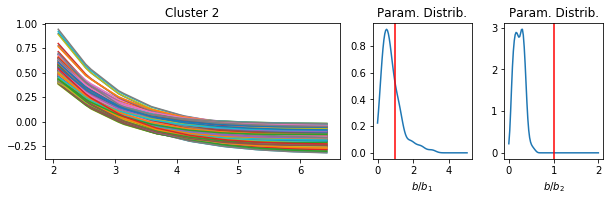

In [117]:
# Plot clusters of predicted time series
for j in range(learn.num_clusters):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,2.5), 
                                        gridspec_kw={'width_ratios': [3,1,1]}) 
    ps = []
    ps2 = []
    for i in range(num_samples):
        if learn.predict_labels[i] == j:
            a = params[i, 0]
            b = params[i, 1]
            b1 = sqrt((1.0-sqrt(1.-8.*a)-2.*a)/2.0)
            b2 = sqrt((1.0+sqrt(1.-8.*a)-2.*a)/2.0)
            ps.append(b/b1)
            ps2.append(b/b2)
            ax1.plot(learn.clean_times, learn.clean_predictions[i, :])
    ax1.set(title='Cluster ' + str(j))
    xs = np.linspace(0.0, 5.0, 100)
    ax2.plot(xs, GKDE(ps)(xs))
    ax2.axvline(1.0, color='r')
    ax2.set(xlabel=r'$b/b_1$', title='Param. Distrib.')
    xs2 = np.linspace(0.0, 2.0, 100)
    ax3.plot(xs2, GKDE(ps2)(xs2))
    ax3.axvline(1.0, color='r')
    ax3.set(xlabel=r'$b/b_2$', title='Param. Distrib.')

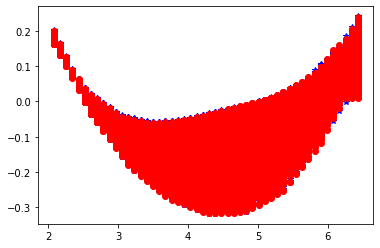

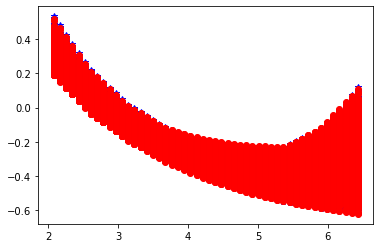

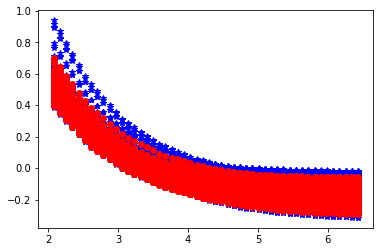

In [118]:
# Plot oberved and predicted clusters
for j in range(learn.num_clusters):
    plt.figure()
    cluster_num = j
    for i in range(num_samples):
        if learn.predict_labels[i] == cluster_num:
            plt.plot(learn.clean_times, learn.clean_predictions[i,:],'b*')
    for i in range(num_obs):
        if learn.obs_labels[i] == cluster_num:
            plt.plot(learn.clean_times, learn.clean_obs[i,:],'ro')

In [119]:
# Find best KPCA transformation for given number of QoI and transform time series data.
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=2)

2 principal components explain 97.8208% of variance for cluster 0 with {'kernel': 'linear'}
2 principal components explain 67.0589% of variance for cluster 0 with {'kernel': 'rbf'}
2 principal components explain 97.4744% of variance for cluster 0 with {'kernel': 'sigmoid'}
2 principal components explain 81.8277% of variance for cluster 0 with {'kernel': 'poly'}
2 principal components explain 97.4940% of variance for cluster 0 with {'kernel': 'cosine'}
Best kPCA for cluster  0  is  {'kernel': 'linear'}
2 principal components explain 97.8208% of variance.
2 principal components explain 99.3037% of variance for cluster 1 with {'kernel': 'linear'}
2 principal components explain 51.2542% of variance for cluster 1 with {'kernel': 'rbf'}
2 principal components explain 93.5455% of variance for cluster 1 with {'kernel': 'sigmoid'}
2 principal components explain 78.1989% of variance for cluster 1 with {'kernel': 'poly'}
2 principal components explain 98.3327% of variance for cluster 1 with {'ker

In [120]:
# Generate kernel density estimates on new QoI
learn.generate_kdes()
# Calculate rejection rates for each cluster and print averages.
r_vals = learn.compute_r()

Average rejection rates for clusters: [0.9869136935462622, 1.039387671750642, 1.0561188052213186]


In [121]:
# Compute marginal probablities for each parameter and initial condition.
param_marginals = []
ic_marginals = []
true_param_marginals = []
true_ic_marginals = []
lam_ptr = []
cluster_weights = []
for i in range(learn.num_clusters):
    lam_ptr.append(np.where(learn.predict_labels == i)[0])
    cluster_weights.append(len(np.where(learn.obs_labels == i)[0]) / num_obs)

for i in range(params.shape[1]):
    true_param_marginals.append(GKDE(params_obs[:,i]))
    param_marginals.append([])
    for j in range(learn.num_clusters):
        param_marginals[i].append(GKDE(params[lam_ptr[j], i], weights=learn.r[j]))
        
##for i in range(ics.shape[1]):
#    true_ic_marginals.append(GKDE(ics_obs[:,i]))
#    ic_marginals.append([])
#    for j in range(learn.num_clusters):
#        ic_marginals[i].append(GKDE(ics[lam_ptr[j], i], weights=learn.r[j]))

In [122]:
# uniform distribution
def unif_dist(x, p_range):
    y = np.zeros(x.shape)
    val = 1.0/(p_range[1] - p_range[0])
    for i, xi in enumerate(x):
        if xi < p_range[0] or xi >  p_range[1]:
            y[i] = 0
        else:
            y[i] = val
    return y

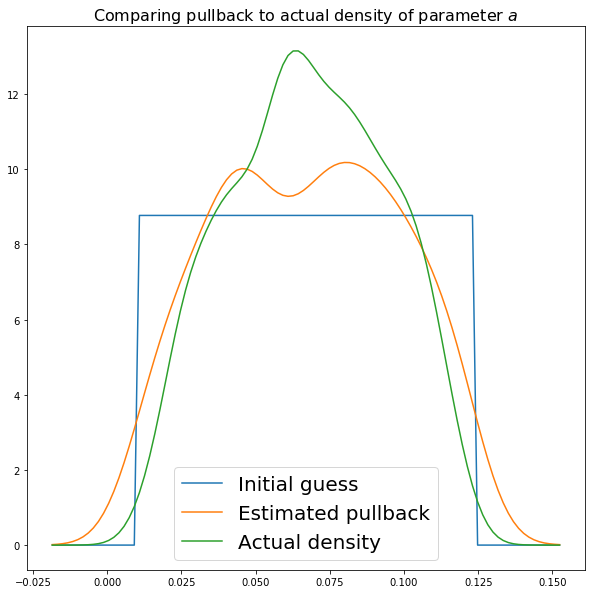

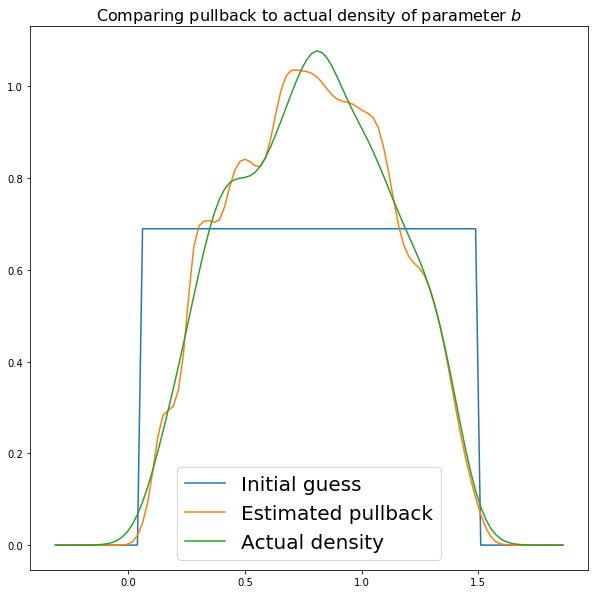

In [123]:
# Plot predicted marginal densities for parameters

for i in range(params.shape[1]):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(params[:, i]), min(params_obs[:, i]))
    x_max = max(max(params[:, i]), max(params_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, param_range[i, :]),
         label = 'Initial guess')
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += param_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Estimated pullback')
    plt.plot(x, true_param_marginals[i](x), label = 'Actual density')
    plt.title('Comparing pullback to actual density of parameter ' + param_labels[i], fontsize=16)
    plt.legend(fontsize=20)

/Users/smattis/src/anaconda3/anaconda3/envs/loq.py/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


IndexError: list index out of range

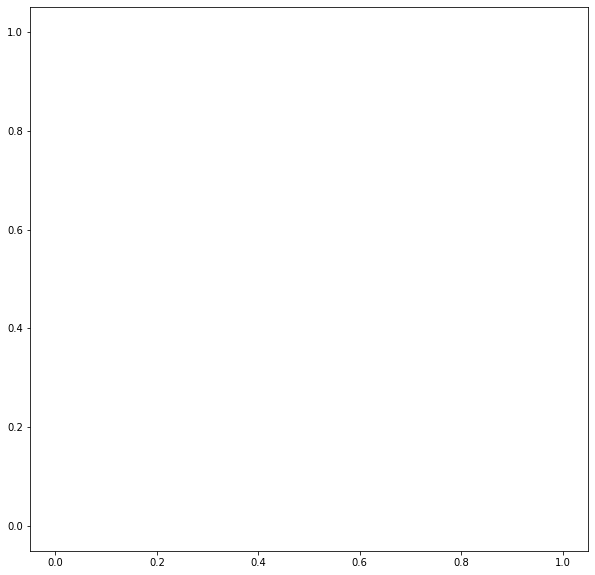

In [124]:
# Plot predicted marginal densities for initial conditions.

for i in range(ics.shape[1]):
    fig = plt.figure(figsize=(10,10))
    fig.clear()
    x_min = min(min(ics[:, i]), min(ics_obs[:, i]))
    x_max = max(max(ics[:, i]), max(ics_obs[:, i]))
    delt = 0.25*(x_max - x_min)
    x = np.linspace(x_min-delt, x_max+delt, 100)
    plt.plot(x, unif_dist(x, ic_range[i, :]),
         label = 'Initial guess')
    mar = np.zeros(x.shape)
    for j in range(learn.num_clusters):
        mar += ic_marginals[i][j](x) * cluster_weights[j]
    plt.plot(x, mar, label = 'Estimated pullback')
    plt.plot(x, true_ic_marginals[i](x), label = 'Actual density')
    plt.title('Comparing pullback to actual density of initial condition ' + ic_labels[i], fontsize=16)
    plt.legend(fontsize=20)